<a href="https://colab.research.google.com/github/AgnesMachau/Moringa-Data-Science-Core-Independent-Project-Wk-9/blob/main/Moringa_Data_Science_Core_Independent_Project_Wk_9_(The_Naive_Bayes_Classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Defining the question**
Our research question is to predict whether an email is a spam or not.

#**Metrics of success**
We will consider our model successful when we are able to predict whether an email is a spam or not at an accuracy of 80% and above

#**Context**
Using the spam base <a href=https://archive.org/download/test1_202002/test%20%281%29.csv>data</a>, we want to use different variables provided to see if we can predict if an email is spam or not.

**Experimental design**
To achieve our goal, the following approach will be used;
* Downloading the dataset
* Reading the dataset
* Checking the dataset
* Tidying the dataset
* External data source validation
* Exploratory Data Analysis
* Implementing the solution
* Challenging the solution
* Conclusions and recommendations


#**Reading the data**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
with open('/content/spambase.names') as f:
    print(f.read())

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [3]:
# geting the names from the spambase.names file
#reading the dataset
#previewing the first 5 columns of the dataset
names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 
         'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 
         'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 
         'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 
         'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
         'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 
         'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 
         'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 
         'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 
         'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 
         'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 
         'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'spam']

spam_base = pd.read_csv('spam.csv', names = names)
spam_base.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
#previewing the last 5 rows of the dataset
spam_base.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


#**Checking the data**

In [5]:
#checking the shape of the data
spam_base.shape

(4601, 58)

In [37]:
len(spam_base.loc[(spam_base['spam'] == '0')])

0

In [6]:
#checking the dataset's columns
spam_base.columns


Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [7]:
#checking the description of the dataset
spam_base.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [8]:
#checking the data types of the columns in the spam dataset
spam_base.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [9]:
#changing the data types of categorical variables to categorical
spam_base = spam_base.astype({'spam': 'category'})
spam_base.dtypes

word_freq_make                 float64
word_freq_address              float64
word_freq_all                  float64
word_freq_3d                   float64
word_freq_our                  float64
word_freq_over                 float64
word_freq_remove               float64
word_freq_internet             float64
word_freq_order                float64
word_freq_mail                 float64
word_freq_receive              float64
word_freq_will                 float64
word_freq_people               float64
word_freq_report               float64
word_freq_addresses            float64
word_freq_free                 float64
word_freq_business             float64
word_freq_email                float64
word_freq_you                  float64
word_freq_credit               float64
word_freq_your                 float64
word_freq_font                 float64
word_freq_000                  float64
word_freq_money                float64
word_freq_hp                   float64
word_freq_hpl            

In [10]:
#checking the dataset's info
spam_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   word_freq_make              4601 non-null   float64 
 1   word_freq_address           4601 non-null   float64 
 2   word_freq_all               4601 non-null   float64 
 3   word_freq_3d                4601 non-null   float64 
 4   word_freq_our               4601 non-null   float64 
 5   word_freq_over              4601 non-null   float64 
 6   word_freq_remove            4601 non-null   float64 
 7   word_freq_internet          4601 non-null   float64 
 8   word_freq_order             4601 non-null   float64 
 9   word_freq_mail              4601 non-null   float64 
 10  word_freq_receive           4601 non-null   float64 
 11  word_freq_will              4601 non-null   float64 
 12  word_freq_people            4601 non-null   float64 
 13  word_freq_report  

In [11]:
#checking the unique values in the dataset
spam_base.nunique()

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

#**Tidying the dataset**

**Data Completeness**

In [12]:
#checking for any null values
spam_base.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

**Data consistency**

In [13]:
#checking for duplicates
#dropping duplicates
spam_base.duplicated().sum()
spam_base = spam_base.drop_duplicates()
spam_base.duplicated().sum()

0

In [14]:
# Checking for any anomalies in the qualitative variables

qcol = ['spam']

for col in qcol:
  print(col, ':', spam_base[col].unique())

spam : [1, 0]
Categories (2, int64): [1, 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

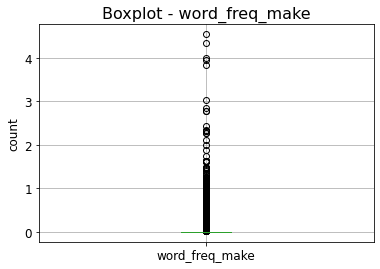

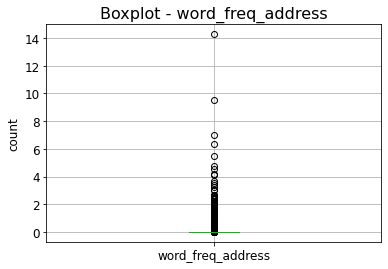

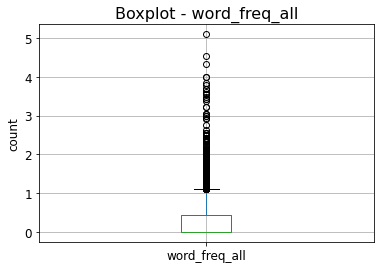

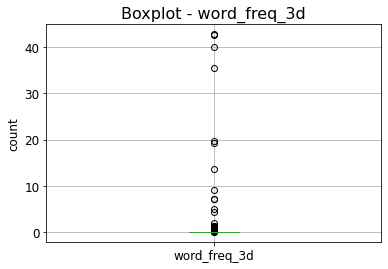

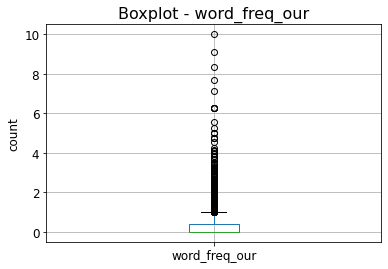

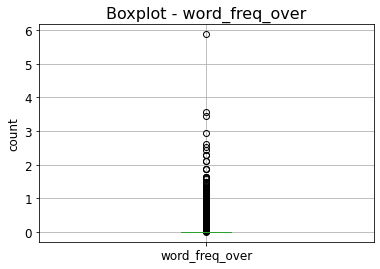

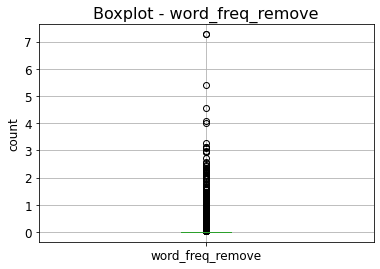

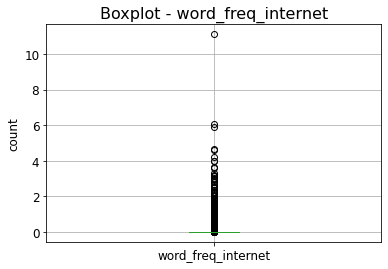

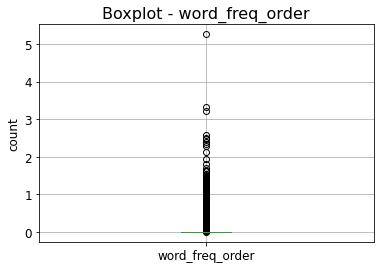

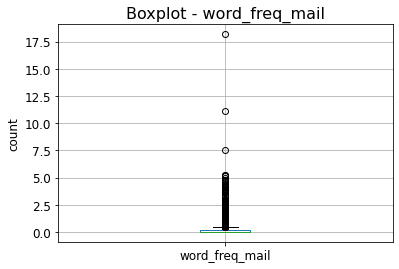

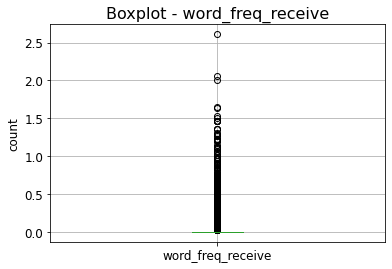

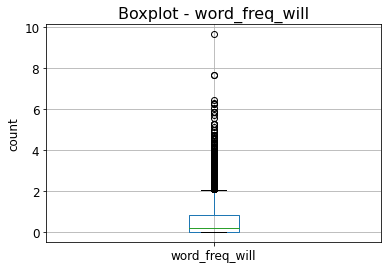

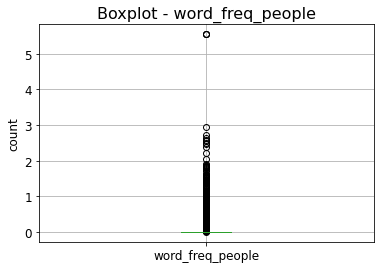

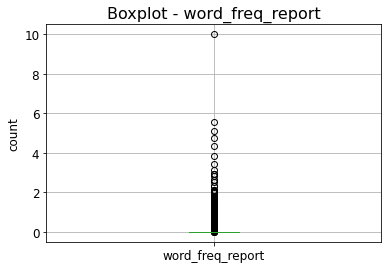

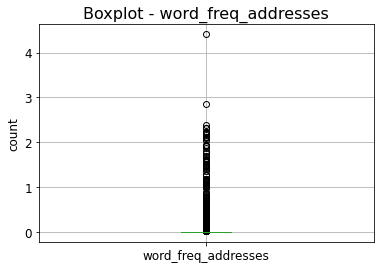

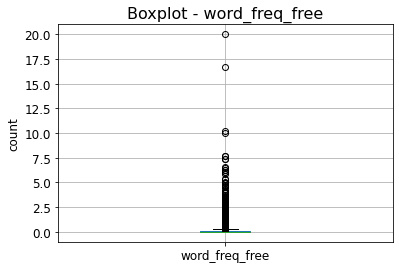

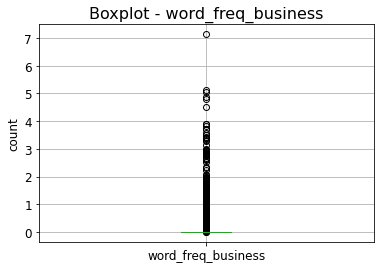

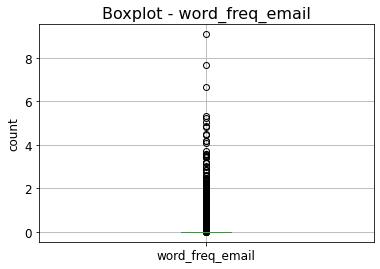

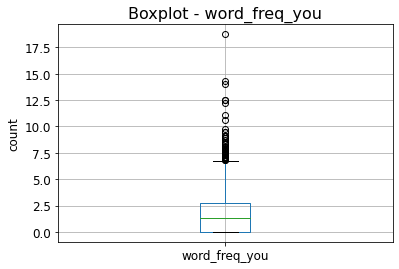

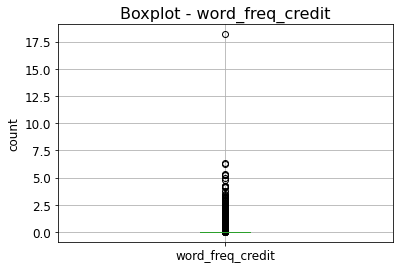

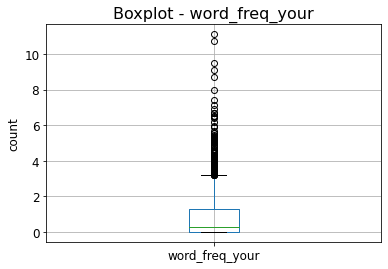

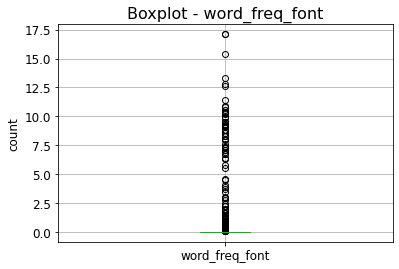

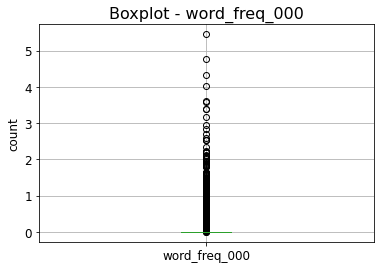

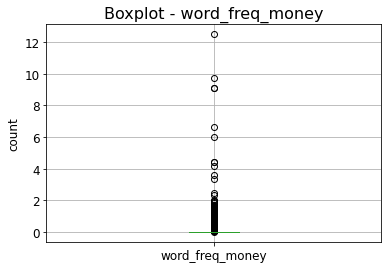

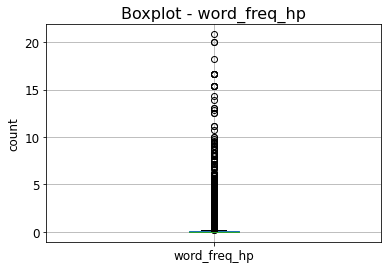

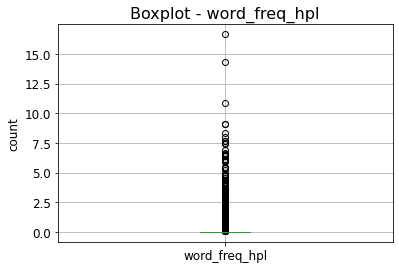

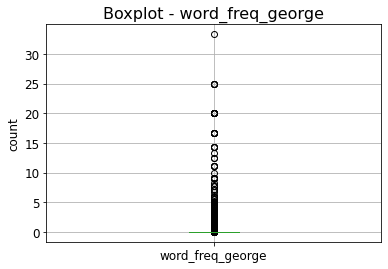

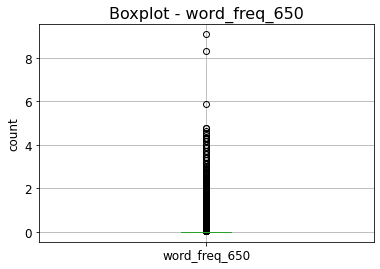

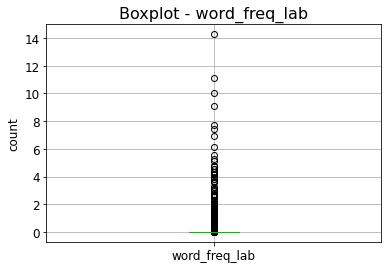

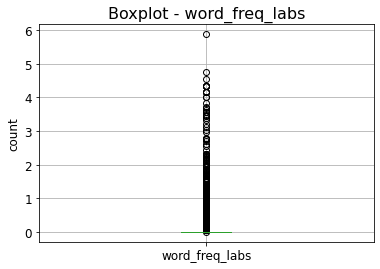

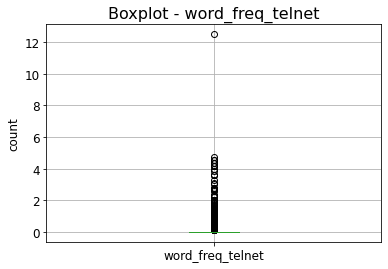

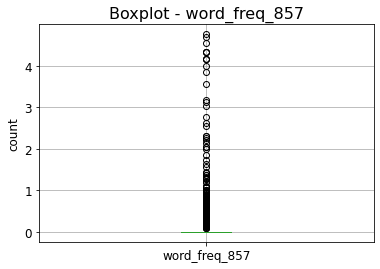

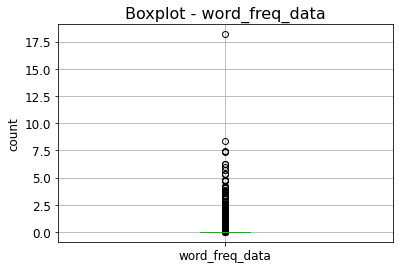

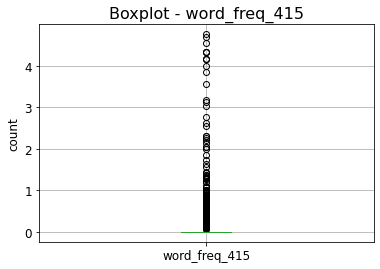

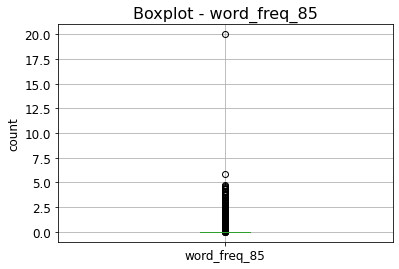

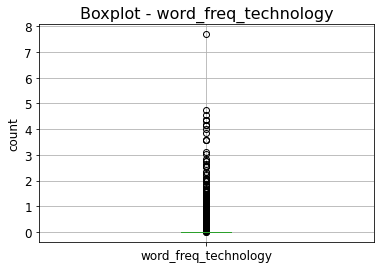

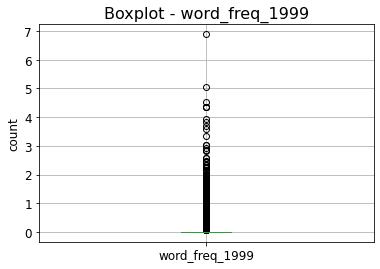

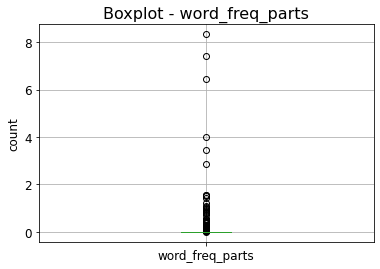

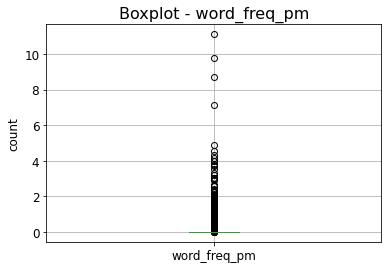

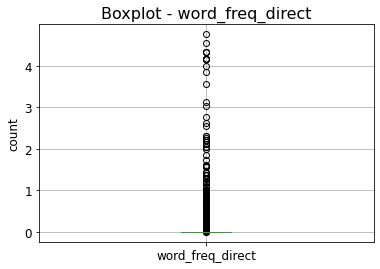

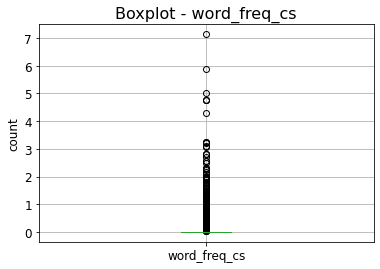

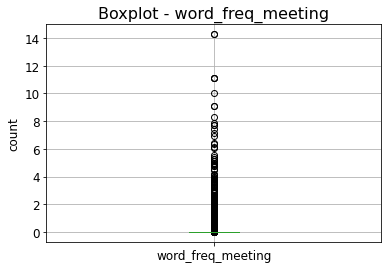

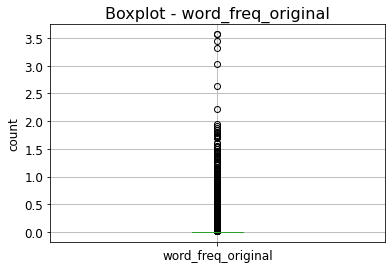

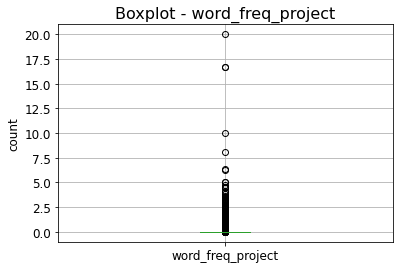

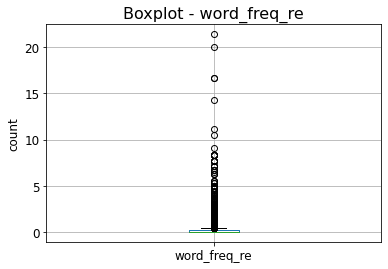

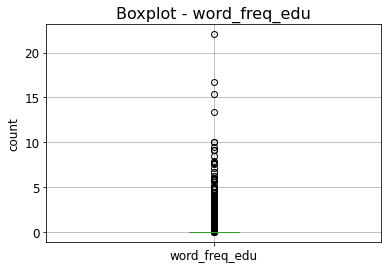

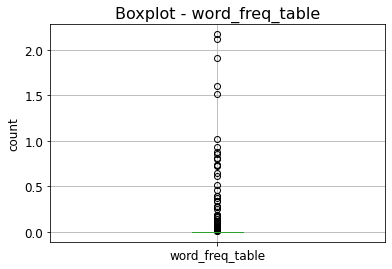

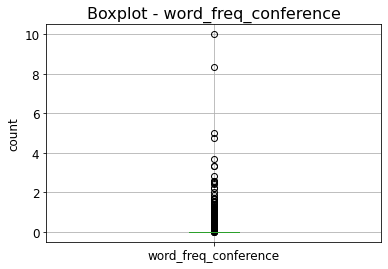

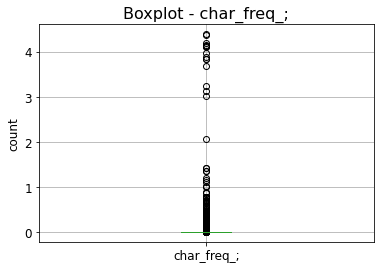

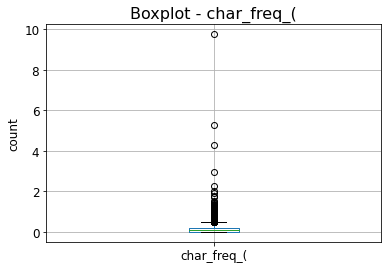

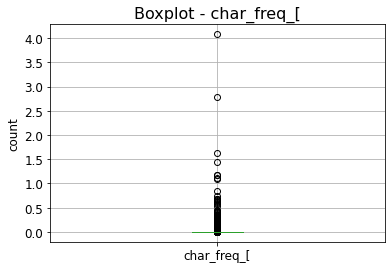

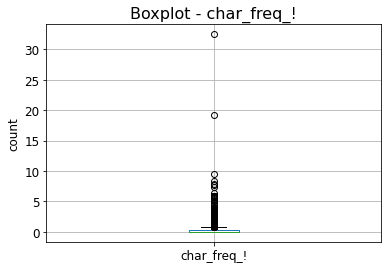

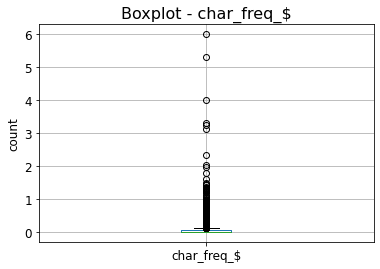

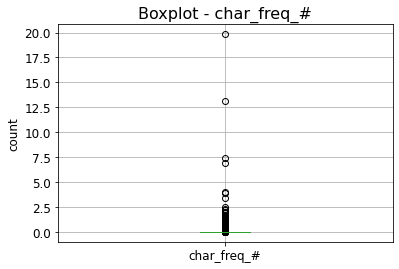

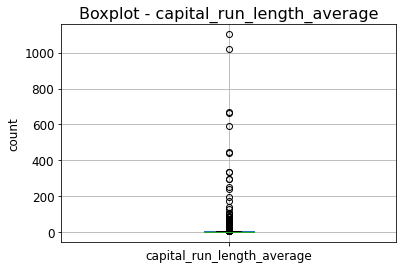

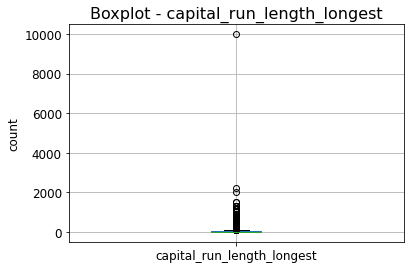

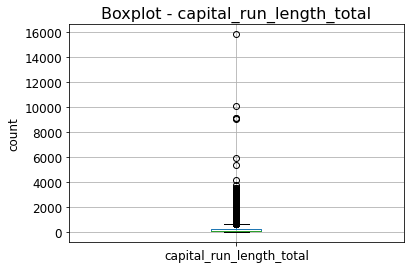

In [15]:
#Checking for Outliers
cols = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']

for column in cols:
    plt.figure()
    spam_base.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

We are not going to drop thre outliers since a lot of data will be lost.

#**External data source validation**

#**Exploratory Analysis**

In [39]:
#Checking the description of the spam base dataset
spam_base.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

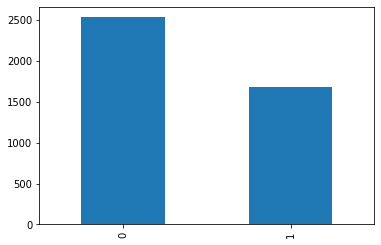

In [16]:
#A bar chart representing the spam column
spam_base['spam'].value_counts().plot.bar()

We can see that most emails are not spam from the bar graph above.

In [17]:
#Checking the correlation of different variables in the spam base dataset
spam_base.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,0.063031,0.075911,0.061985,0.032263,0.022454,0.065443,0.081471,0.051571,0.120563,0.020924,0.121458,-0.025574,0.126478,0.205689,-0.075054,-0.063467,-0.048086,-0.050054,-0.041541,-0.054241,-0.038899,-0.031634,-0.042715,-0.026322,-0.046083,-0.057296,-0.058771,-0.008626,-0.011199,-0.035467,-0.005280,-0.026546,-0.025603,-0.022980,-0.037848,-0.034455,-0.000950,-0.018904,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,-0.006735,0.117797,0.001214,0.007064,0.061282,-0.053573,-0.044627,-0.011228,-0.033000,-0.026048,-0.029419,-0.015937,0.028852,-0.032575,0.026039,-0.025524,-0.028262,0.003749,-0.012708,-0.016208,0.002326,-0.019350,-0.035908,0.037681,-0.029055,0.020029,-0.026004,-0.012337,-0.020947,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,-0.039464,0.106694,0.031150,-0.092684,-0.066464,-0.081297,-0.051471,-0.057847,-0.030519,-0.036610,-0.063579,-0.058002,-0.063417,-0.048968,-0.047593,-0.074329,0.031756,-0.017418,-0.046013,-0.030822,-0.007620,-0.052736,-0.056883,-0.056600,-0.060558,0.027384,-0.029465,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,-0.013191,-0.018577,-0.013153,0.003379,0.005375,0.005798,-0.002827,0.016561,-0.009933,-0.005006,0.004577,0.030589,0.014715,0.025851,-0.015702,-0.014030,-0.009710,-0.010630,-0.007931,-0.010911,-0.007654,-0.006967,-0.008246,-0.006975,-0.005907,-0.006309,-0.007436,-0.002723,-0.004506,-0.007654,-0.006075,-0.008318,-0.009384,-0.006114,-0.013178,-0.009432,-0.003409,-0.001861,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,-0.022715,0.062136,0.000321,-0.076783,-0.079807,-0.062482,-0.064151,0.039627,-0.053613,-0.042054,-0.024256,-0.034749,-0.024555,-0.051058,-0.052210,-0.077682,0.133057,-0.045512,-0.017580,-0.052325,0.107706,-0.054583,0.002771,-0.049497,-0.083315,-0.028146,-0.035040,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,-0.086682,-0.089520,-0.050811,-0.067771,-0.048898,-0.048262,-0.046347,-0.03

(array([3.86e+03, 2.51e+02, 6.60e+01, 1.40e+01, 3.00e+00, 7.00e+00,
        4.00e+00, 0.00e+00, 3.00e+00, 2.00e+00]),
 array([0.   , 0.454, 0.908, 1.362, 1.816, 2.27 , 2.724, 3.178, 3.632,
        4.086, 4.54 ]),
 <a list of 10 Patch objects>)

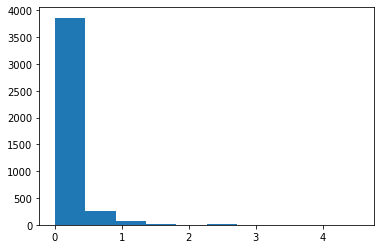

In [18]:
#A histogram representing the age column
plt.hist(spam_base['word_freq_make'])

(array([3.949e+03, 1.920e+02, 4.500e+01, 1.200e+01, 8.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([0.   , 0.555, 1.11 , 1.665, 2.22 , 2.775, 3.33 , 3.885, 4.44 ,
        4.995, 5.55 ]),
 <a list of 10 Patch objects>)

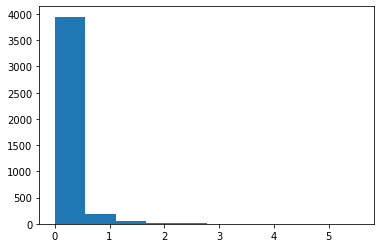

In [19]:
#A histogram representing the age column
plt.hist(spam_base['word_freq_people'])

(array([4.198e+03, 7.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.    ,  1.9829,  3.9658,  5.9487,  7.9316,  9.9145, 11.8974,
        13.8803, 15.8632, 17.8461, 19.829 ]),
 <a list of 10 Patch objects>)

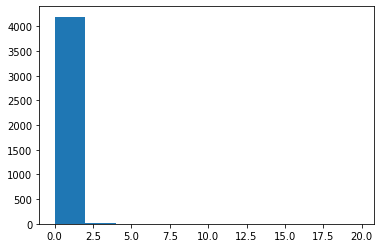

In [20]:
#A histogram representing the age column
plt.hist(spam_base['char_freq_#'])

We can see that the variables are skewed to the right.

**Reduction**

In [21]:
#Pre processing
X = spam_base.drop(['spam'], axis = 1)
y = spam_base['spam']

In [22]:
# Splitting into training and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# Normalization

# Dependents had an issue because of the +

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [25]:
# Obtaining the explained variance ratio which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio"

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.11120117, 0.05665277, 0.03678642, 0.02917539, 0.02707584,
       0.02542205])

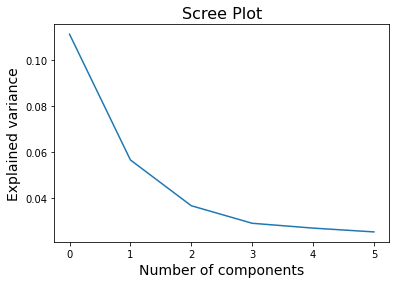

In [26]:
# Plotting our scree plot

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components', fontsize = 14)
plt.ylabel('Explained variance', fontsize = 14)
plt.title('Scree Plot', fontsize = 16)
plt.show()

In [27]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [28]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[452  43]
 [ 70 277]]
Accuracy 0.8657957244655582


#**Implementing the solution**

In [29]:
#splitting our train dataset into attributes and labels
X = spam_base.drop(['spam'], axis = 1)
y = spam_base['spam']

In [30]:
#dividing our data into training and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [31]:
#Feature scalling so that all features can be evaluated
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [33]:
#Evaluating the model
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7909738717339667


In [40]:
#dividing our data into training and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#Feature scalling so that all features can be evaluated
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
#Evaluating the model
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.830166270783848


In [41]:
#dividing our data into training and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
#Feature scalling so that all features can be evaluated
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
#Evaluating the model
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.833729216152019


In [42]:
#dividing our data into training and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
#Feature scalling so that all features can be evaluated
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
#Evaluating the model
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7998812351543944


The best model in this case is when the test size is 0.3. At this test size the accuracy is 83.3% which is a good percentage.

#**Challenging the solution**
Maybe the accuracy would have increased if the dataset didn't have so many outliers and if we would have concentrated on the most important variables.

**Did we have the right data?**

Yes we had the right data.


**Did we have enough data?**

Yes


**Did we have the right question**

Yes we did.

**Conclusion and recommendation**
We conclude that the best model is the model with a test size of 0.3 and we recommend that it should be used for prediction since it has a higher chance of giving accurate values compared to the other models.